In [37]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [5]:
majors = pd.read_csv("/Users/ariadnapuigventos/Documents/CURSOS/BRIDGE/DS_Ejercicios_Python/BootCamp_TheBridge/Proyecto_Navidad_Ariadna/documentation/world_marathon_majors.csv", sep= ";")
print(majors)

     year           winner  gender        country      time marathon
0    2014   Dennis Kimetto    Male          Kenya  02:02:57   Berlin
1    2011   Geoffrey Mutai    Male          Kenya  02:03:02   Boston
2    2016  Kenenisa Bekele    Male       Ethiopia  02:03:03   Berlin
3    2016   Eliud Kipchoge    Male          Kenya  02:03:05   London
4    2013   Wilson Kipsang    Male          Kenya  02:03:23   Berlin
..    ...              ...     ...            ...       ...      ...
531  1966       Bobbi Gibb  Female  United States  03:21:40   Boston
532  1974  Jutta von Haase  Female        Germany  03:22:01   Berlin
533  1969  Sara Mae Berman  Female  United States  03:22:46   Boston
534  1967       Bobbi Gibb  Female  United States  03:27:17   Boston
535  1968       Bobbi Gibb  Female  United States  03:30:00   Boston

[536 rows x 6 columns]


In [6]:
import os.path

In [7]:
majors.describe()

,year
count,536.000000
mean,1987.919776
std,26.104662
min,1897.000000
25%,1980.000000
50%,1993.000000
75%,2007.000000
max,2018.000000


In [8]:
"""
outliers = sns.boxplot(x = majors["time"].astype('timedelta64[s]').str.strip())
print(outliers)
Q1 = majors["time"].astype('timedelta64[s]').quantile(0.25).str.strip()
print(Q1)
Q3 = majors["time"].astype('timedelta64[s]').quantile(0.75).str.strip()
print(Q3)
IQR = Q3 - Q1
print(IQR)
"""

'\noutliers = sns.boxplot(x = majors["time"].astype(\'timedelta64[s]\').str.strip())\nprint(outliers)\nQ1 = majors["time"].astype(\'timedelta64[s]\').quantile(0.25).str.strip()\nprint(Q1)\nQ3 = majors["time"].astype(\'timedelta64[s]\').quantile(0.75).str.strip()\nprint(Q3)\nIQR = Q3 - Q1\nprint(IQR)\n'

In [9]:
veces_countries = np.array([majors["country"].value_counts()])
veces_countries

array([[136, 104,  51,  36,  35,  22,  20,  17,  11,  10,  10,   8,   8,
          7,   6,   5,   5,   5,   5,   4,   3,   3,   3,   2,   2,   2,
          2,   2,   2,   2,   2,   1,   1,   1,   1,   1,   1]])

In [10]:
nacionalidad = majors.country.value_counts()
print(nacionalidad)

Kenya             136
United States     104
Ethiopia           51
Germany            36
United Kingdom     35
Japan              22
Norway             20
Canada             17
Portugal           11
Finland            10
Mexico             10
Russia              8
Poland              8
Brazil              7
Italy               6
New Zealand         5
Morocco             5
South Africa        5
Belgium             5
Tanzania            4
Ireland             3
Australia           3
South Korea         3
Greece              2
Sweden              2
Spain               2
Colombia            2
Switzerland         2
Denmark             2
Romania             2
Latvia              2
China               1
Eritrea             1
Guatemala           1
Soviet Union        1
Hungary             1
Yugoslavia          1
Name: country, dtype: int64


In [11]:
diccionario = dict(majors["country"].value_counts())
diccionario

{'Kenya': 136,
 'United States': 104,
 'Ethiopia': 51,
 'Germany': 36,
 'United Kingdom': 35,
 'Japan': 22,
 'Norway': 20,
 'Canada': 17,
 'Portugal': 11,
 'Finland': 10,
 'Mexico': 10,
 'Russia': 8,
 'Poland': 8,
 'Brazil': 7,
 'Italy': 6,
 'New Zealand': 5,
 'Morocco': 5,
 'South Africa': 5,
 'Belgium': 5,
 'Tanzania': 4,
 'Ireland': 3,
 'Australia': 3,
 'South Korea': 3,
 'Greece': 2,
 'Sweden': 2,
 'Spain': 2,
 'Colombia': 2,
 'Switzerland': 2,
 'Denmark': 2,
 'Romania': 2,
 'Latvia': 2,
 'China': 1,
 'Eritrea': 1,
 'Guatemala': 1,
 'Soviet Union': 1,
 'Hungary': 1,
 'Yugoslavia': 1}

In [12]:
country_table = pd.DataFrame(diccionario, index = ["country"]).T
country_table.head(10)

,country
Kenya,136
United States,104
Ethiopia,51
Germany,36
United Kingdom,35
Japan,22
Norway,20
Canada,17
Portugal,11
Finland,10


In [13]:
mylabels = country_table.index
mylabels

Index(['Kenya', 'United States', 'Ethiopia', 'Germany', 'United Kingdom',
       'Japan', 'Norway', 'Canada', 'Portugal', 'Finland', 'Mexico', 'Russia',
       'Poland', 'Brazil', 'Italy', 'New Zealand', 'Morocco', 'South Africa',
       'Belgium', 'Tanzania', 'Ireland', 'Australia', 'South Korea', 'Greece',
       'Sweden', 'Spain', 'Colombia', 'Switzerland', 'Denmark', 'Romania',
       'Latvia', 'China', 'Eritrea', 'Guatemala', 'Soviet Union', 'Hungary',
       'Yugoslavia'],
      dtype='object')

In [14]:
counts = []
for value in diccionario.values():
    counts.append(value)
print(counts)

[136, 104, 51, 36, 35, 22, 20, 17, 11, 10, 10, 8, 8, 7, 6, 5, 5, 5, 5, 4, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1]


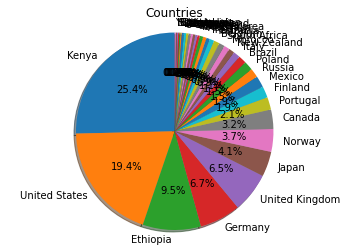

In [15]:
mylabels = country_table.index #str lista de países
mysize = counts #int cantidad de veces que se repiten
fig1, ax1 = plt.subplots()
ax1.pie(mysize, labels = mylabels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Countries")
ax1.axis('equal')
plt.show()

In [16]:
df2 = country_table[:6].copy()
new_row = pd.DataFrame({"country" : [country_table[5:].sum()]})
df2 = pd.concat([df2, new_row])
df3 = df2.rename(index={df2.index[6] : "others"})
df3

,country
Kenya,136
United States,104
Ethiopia,51
Germany,36
United Kingdom,35
Japan,22
others,country 174 dtype: int64


In [17]:
df3.iloc[6]
#df3.replace({"country 174": 174})

country    country    174
dtype: int64
Name: others, dtype: object

In [18]:
dict1 = {"Country" : ['Kenya', 'United States', 'Ethiopia', 'Germany', 'United Kingdom', 'Japan', 'Norway', 'Canada', 'Portugal', 'Finland', 'Mexico', 'Russia', 'Poland', 'Brazil', 'Italy', 'New Zealand', 'Morocco', 'Belgium', 'South Africa', 'Tanzania', 'Australia', 'South Korea', 'Ireland', 'Latvia', 'Spain', 'Denmark', 'Colombia', 'Greece', 'Switzerland', 'Romania', 'Sweden', 'Yugoslavia', 'Hungary', 'China', 'Guatemala', 'Eritrea', 'Soviet Union'], "Counts" : [136, 104, 51, 36, 35, 22, 20, 17, 11, 10, 10, 8, 8, 7, 6, 5, 5, 5, 5, 4, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1]}
Countries = pd.DataFrame(dict1)
Countries.head(6)

,Country,Counts
0,Kenya,136
1,United States,104
2,Ethiopia,51
3,Germany,36
4,United Kingdom,35
5,Japan,22


In [19]:
Countries["Counts"].sum()

536

In [20]:
new_row = pd.DataFrame(data = {"Country" : ["Others"], "Counts" : [Countries["Counts"][10:].sum()]})
new_row

,Country,Counts
0,Others,94


In [21]:
Top_5_Countries = Countries[:10].copy()
Top_5_Countries

,Country,Counts
0,Kenya,136
1,United States,104
2,Ethiopia,51
3,Germany,36
4,United Kingdom,35
5,Japan,22
6,Norway,20
7,Canada,17
8,Portugal,11
9,Finland,10


In [22]:
Top_others = pd.concat([Top_5_Countries, new_row])
Top_others

,Country,Counts
0,Kenya,136
1,United States,104
2,Ethiopia,51
3,Germany,36
4,United Kingdom,35
5,Japan,22
6,Norway,20
7,Canada,17
8,Portugal,11
9,Finland,10


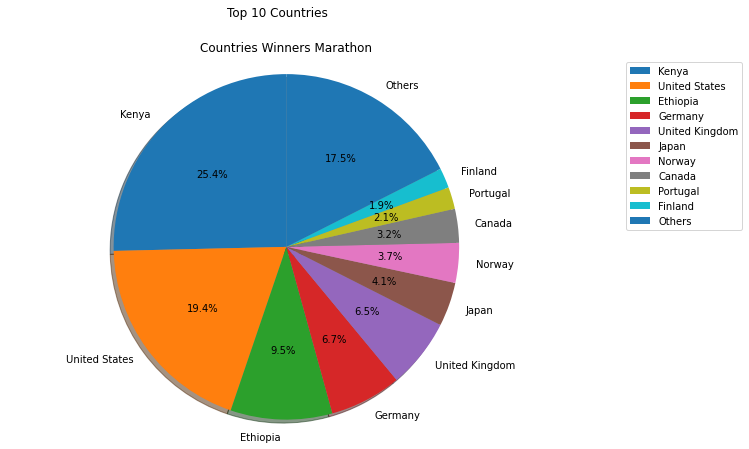

<Figure size 432x288 with 0 Axes>

In [23]:
fig1, ax1 = plt.subplots(figsize = (10,7))
ax1.pie(Top_others["Counts"], labels = Top_others["Country"], autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Countries Winners Marathon")
ax1.axis('equal')
plt.legend(Top_others["Country"], bbox_to_anchor=(1.10, 1), loc= 'upper left')
plt.suptitle("Top 10 Countries", fontsize=12)
plt.show()
plt.savefig('Top_10_Countries.png')

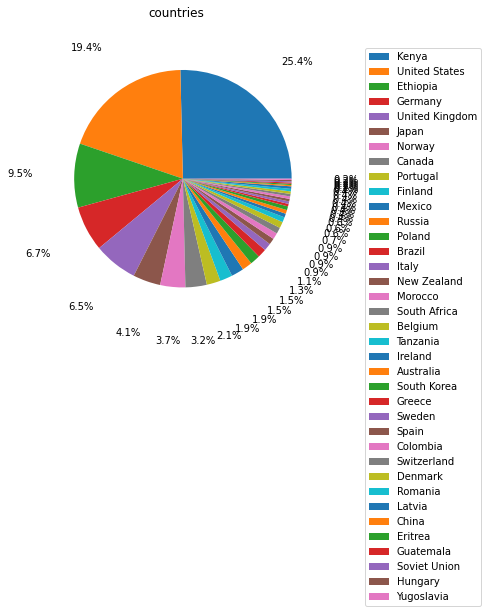

In [24]:
# Plotting graph
plt.figure(figsize=(7,5))
plt.pie(mysize,  autopct='%1.1f%%', startangle=0, shadow= False, pctdistance = 1.5)
plt.suptitle('Gender ratio', fontsize=12)

# Legend and titles
plt.legend(mylabels, bbox_to_anchor=(1.15, 1), loc= 'upper left')
plt.suptitle('countries', fontsize=12)

plt.show()

In [25]:
mysize = country_table["country"].value_counts()
mysize

2      8
1      6
5      4
3      3
10     2
8      2
17     1
11     1
20     1
104    1
136    1
7      1
6      1
22     1
4      1
35     1
36     1
51     1
Name: country, dtype: int64

<AxesSubplot:ylabel='Frequency'>

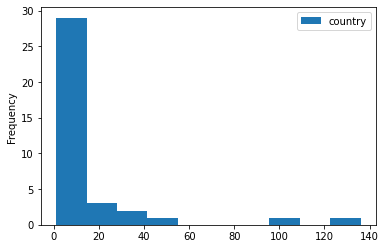

In [26]:
country_table.plot.hist()

In [27]:
majors["gender"] = majors["gender"].astype('category')
majors["gender"]

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
531    Female
532    Female
533    Female
534    Female
535    Female
Name: gender, Length: 536, dtype: category
Categories (2, object): ['Female', 'Male']

<AxesSubplot:>

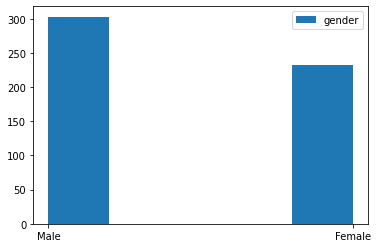

In [28]:
majors["gender"].hist(bins=5, legend="Gender", grid=False)

In [29]:
majors.country = majors.country.astype('category')
majors.country

0              Kenya
1              Kenya
2           Ethiopia
3              Kenya
4              Kenya
           ...      
531    United States
532          Germany
533    United States
534    United States
535    United States
Name: country, Length: 536, dtype: category
Categories (37, object): ['Australia', 'Belgium', 'Brazil', 'Canada', ..., 'Tanzania', 'United Kingdom', 'United States', 'Yugoslavia']

In [30]:
majors["time"] = pd.to_timedelta(majors["time"].str.strip())
majors["time"]

0     0 days 02:02:57
1     0 days 02:03:02
2     0 days 02:03:03
3     0 days 02:03:05
4     0 days 02:03:23
            ...      
531   0 days 03:21:40
532   0 days 03:22:01
533   0 days 03:22:46
534   0 days 03:27:17
535   0 days 03:30:00
Name: time, Length: 536, dtype: timedelta64[ns]

In [31]:
majors["time"] = majors["time"].astype('timedelta64[s]')
majors["time"]

0       7377.0
1       7382.0
2       7383.0
3       7385.0
4       7403.0
        ...   
531    12100.0
532    12121.0
533    12166.0
534    12437.0
535    12600.0
Name: time, Length: 536, dtype: float64

<AxesSubplot:>

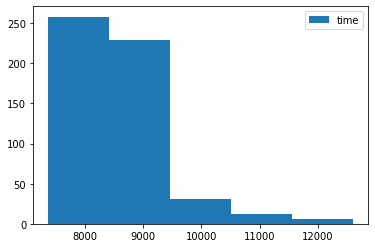

In [32]:
majors["time"].hist(bins=5, legend="Gender", grid=False)

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'time'}>]], dtype=object)

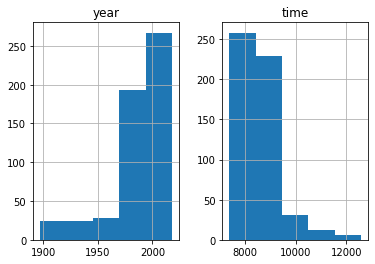

In [33]:
majors.hist(bins=5)

In [34]:
majors["marathon"] = majors.marathon.astype("category")
majors["marathon"]

0      Berlin
1      Boston
2      Berlin
3      London
4      Berlin
        ...  
531    Boston
532    Berlin
533    Boston
534    Boston
535    Boston
Name: marathon, Length: 536, dtype: category
Categories (6, object): ['Berlin', 'Boston', 'Chicago', 'London', 'NYC', 'Tokyo']

In [35]:
majors["gender"] = majors['gender'].replace(['Male','Female'],[0,1],inplace=True)
majors["gender"]

0      None
1      None
2      None
3      None
4      None
       ... 
531    None
532    None
533    None
534    None
535    None
Name: gender, Length: 536, dtype: object

In [36]:
majors.groupby("gender").

SyntaxError: invalid syntax (<ipython-input-36-48a14cca21bb>, line 1)

In [201]:
majors.groupby("gender").median()

,year,time
gender,,
Female,1997,8756.0
Male,1990,7811.0


<AxesSubplot:>

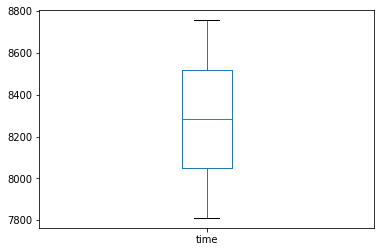

In [212]:
test = majors.groupby("gender").median("time").drop("year", axis=1)
test.plot.box()

In [ ]:
test2 = majors.groupby("gender").agg({"time": ([max], [min])})
test2

In [200]:
majors.groupby(["gender", "country"]).median().sort_values("time", ascending=True)

year    time
gender country                    
Male   Morocco      1999.0  7630.0
       Ethiopia     2010.0  7635.5
       Switzerland  2008.0  7643.0
       Kenya        2007.0  7655.0
       Eritrea      2016.0  7671.0
...                    ...     ...
       China           NaN     NaN
       Hungary         NaN     NaN
       Latvia          NaN     NaN
       Romania         NaN     NaN
       Russia          NaN     NaN

[74 rows x 2 columns]

In [232]:
majors[majors["gender"] == "Female"]

,year,winner,gender,country,time,marathon


It's going to show Correlation Matrix

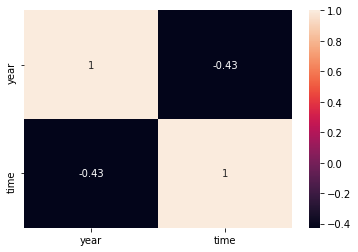

In [132]:

corrMatrix = majors.country.corr("marathon")
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [137]:
print(mylabels)
print(mysize)

Index(['Kenya', 'United States', 'Ethiopia', 'Germany', 'United Kingdom',
       'Japan', 'Norway', 'Canada', 'Portugal', 'Finland', 'Mexico', 'Russia',
       'Poland', 'Brazil', 'Italy', 'Belgium', 'South Africa', 'New Zealand',
       'Morocco', 'Tanzania', 'Australia', 'South Korea', 'Ireland', 'Denmark',
       'Switzerland', 'Sweden', 'Greece', 'Spain', 'Romania', 'Colombia',
       'Latvia', 'Guatemala', 'Soviet Union', 'Yugoslavia', 'China', 'Hungary',
       'Eritrea'],
      dtype='object')
[136, 104, 51, 36, 35, 22, 20, 17, 11, 10, 10, 8, 8, 7, 6, 5, 5, 5, 5, 4, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1]


In [139]:
df = pd.read_csv("https://developers.google.com/public-data/docs/canonical/countries_csv", sep= "\t")
print(df)

                                        <!doctype html>
0                                                <html 
1                                             lang="en"
2                                            dir="ltr">
3                                                <head>
4         <meta name="google-signin-client-id" conte...
...                                                 ...
2621      'https://www.gstatic.com/devrel-devsite/pr...
2622                                          </script>
2623      <devsite-a11y-announce></devsite-a11y-anno...
2624                                            </body>
2625                                            </html>

[2626 rows x 1 columns]


In [144]:
df = pd.read_csv("/Users/ariadnapuigventos/Documents/CURSOS/BRIDGE/DS_Ejercicios_Python/BootCamp_TheBridge/Proyecto_Navidad_Ariadna/documentation/altitud_countries.csv", sep= ";")
print(df)

    country   latitude  longitude                  name  Unnamed: 4  \
0        AD  42.546245   1.601554               Andorra         NaN   
1        AE  23.424076  53.847818  United Arab Emirates         NaN   
2        AF  33.939110  67.709953           Afghanistan         NaN   
3        AG  17.060816 -61.796428   Antigua and Barbuda         NaN   
4        AI  18.220554 -63.068615              Anguilla         NaN   
..      ...        ...        ...                   ...         ...   
240      YE  15.552727  48.516388                 Yemen         NaN   
241      YT -12.827500  45.166244               Mayotte         NaN   
242      ZA -30.559482  22.937506          South Africa         NaN   
243      ZM -13.133897  27.849332                Zambia         NaN   
244      ZW -19.015438  29.154857              Zimbabwe         NaN   

     Unnamed: 5  Unnamed: 6  
0           NaN         NaN  
1           NaN         NaN  
2           NaN         NaN  
3           NaN         NaN

In [145]:
df.columns

Index(['country', 'latitude', 'longitude', 'name', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6'],
      dtype='object')

In [148]:
df.drop(["country", "Unnamed: 4", "Unnamed: 5", "Unnamed: 6"], axis=1)

,latitude,longitude,name
0,42.546245,1.601554,Andorra
1,23.424076,53.847818,United Arab Emirates
2,33.939110,67.709953,Afghanistan
3,17.060816,-61.796428,Antigua and Barbuda
4,18.220554,-63.068615,Anguilla
...,...,...,...
240,15.552727,48.516388,Yemen
241,-12.827500,45.166244,Mayotte
242,-30.559482,22.937506,South Africa
243,-13.133897,27.849332,Zambia


In [178]:
prueba = df.drop(["country", "Unnamed: 4", "Unnamed: 5", "Unnamed: 6"], axis=1).rename(columns={"name": "country"})
prueba

,latitude,longitude,country
0,42.546245,1.601554,Andorra
1,23.424076,53.847818,United Arab Emirates
2,33.939110,67.709953,Afghanistan
3,17.060816,-61.796428,Antigua and Barbuda
4,18.220554,-63.068615,Anguilla
...,...,...,...
240,15.552727,48.516388,Yemen
241,-12.827500,45.166244,Mayotte
242,-30.559482,22.937506,South Africa
243,-13.133897,27.849332,Zambia


In [198]:
mask = prueba.loc[(prueba["country"] == 'Kenya' or 'United States' or 'Ethiopia' or 'Germany' or 'United Kingdom' or 'Japan' or 'Norway' or 'Canada' or 'Portugal' or 'Finland' or 'Mexico' or 'Russia' or 'Poland' or 'Brazil' or 'Italy' or 'Belgium' or 'South Africa' or 'New Zealand' or 'Morocco' or 'Tanzania' or 'Australia' or 'South Korea' or 'Ireland' or 'Denmark' or 'Switzerland' or 'Sweden' or 'Greece' or 'Spain' or 'Romania' or 'Colombia' or 'Latvia' or 'Guatemala' or 'Soviet Union' or 'Yugoslavia' or 'China' or 'Hungary' or 'Eritrea')]
mask

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [180]:
prueba.country.astype("category")

0                   Andorra
1      United Arab Emirates
2               Afghanistan
3       Antigua and Barbuda
4                  Anguilla
               ...         
240                   Yemen
241                 Mayotte
242            South Africa
243                  Zambia
244                Zimbabwe
Name: country, Length: 245, dtype: category
Categories (245, object): ['Afghanistan', 'Albania', 'Algeria', 'American Samoa', ..., 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe']

In [162]:
np.array(df.name)

array(['Andorra', 'United Arab Emirates', 'Afghanistan',
       'Antigua and Barbuda', 'Anguilla', 'Albania', 'Armenia',
       'Netherlands Antilles', 'Angola', 'Antarctica', 'Argentina',
       'American Samoa', 'Austria', 'Australia', 'Aruba', 'Azerbaijan',
       'Bosnia and Herzegovina', 'Barbados', 'Bangladesh', 'Belgium',
       'Burkina Faso', 'Bulgaria', 'Bahrain', 'Burundi', 'Benin',
       'Bermuda', 'Brunei', 'Bolivia', 'Brazil', 'Bahamas', 'Bhutan',
       'Bouvet Island', 'Botswana', 'Belarus', 'Belize', 'Canada',
       'Cocos [Keeling] Islands', 'Congo [DRC]',
       'Central African Republic', 'Congo [Republic]', 'Switzerland',
       "Côte d'Ivoire", 'Cook Islands', 'Chile', 'Cameroon', 'China',
       'Colombia', 'Costa Rica', 'Cuba', 'Cape Verde', 'Christmas Island',
       'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Denmark',
       'Dominica', 'Dominican Republic', 'Algeria', 'Ecuador', 'Estonia',
       'Egypt', 'Western Sahara', 'Eritrea', 'Spain', 'Ethi

In [174]:
countries = []
for country in np.array(df.name):
    if country == 'Kenya' or 'United States' or 'Ethiopia' or 'Germany' or 'United Kingdom' or 'Japan' or 'Norway' or 'Canada' or 'Portugal' or 'Finland' or 'Mexico' or 'Russia' or 'Poland' or 'Brazil' or 'Italy' or 'Belgium' or 'South Africa' or 'New Zealand' or 'Morocco' or 'Tanzania' or 'Australia' or 'South Korea' or 'Ireland' or 'Denmark' or 'Switzerland' or 'Sweden' or 'Greece' or 'Spain' or 'Romania' or 'Colombia' or 'Latvia' or 'Guatemala' or 'Soviet Union' or 'Yugoslavia' or 'China' or 'Hungary' or 'Eritrea':
        countries.append(country)
print(countries)

['Andorra', 'United Arab Emirates', 'Afghanistan', 'Antigua and Barbuda', 'Anguilla', 'Albania', 'Armenia', 'Netherlands Antilles', 'Angola', 'Antarctica', 'Argentina', 'American Samoa', 'Austria', 'Australia', 'Aruba', 'Azerbaijan', 'Bosnia and Herzegovina', 'Barbados', 'Bangladesh', 'Belgium', 'Burkina Faso', 'Bulgaria', 'Bahrain', 'Burundi', 'Benin', 'Bermuda', 'Brunei', 'Bolivia', 'Brazil', 'Bahamas', 'Bhutan', 'Bouvet Island', 'Botswana', 'Belarus', 'Belize', 'Canada', 'Cocos [Keeling] Islands', 'Congo [DRC]', 'Central African Republic', 'Congo [Republic]', 'Switzerland', "Côte d'Ivoire", 'Cook Islands', 'Chile', 'Cameroon', 'China', 'Colombia', 'Costa Rica', 'Cuba', 'Cape Verde', 'Christmas Island', 'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Denmark', 'Dominica', 'Dominican Republic', 'Algeria', 'Ecuador', 'Estonia', 'Egypt', 'Western Sahara', 'Eritrea', 'Spain', 'Ethiopia', 'Finland', 'Fiji', 'Falkland Islands [Islas Malvinas]', 'Micronesia', 'Faroe Islands', 'France', 

Text(0.5, 1.0, 'Correlation Matrix')

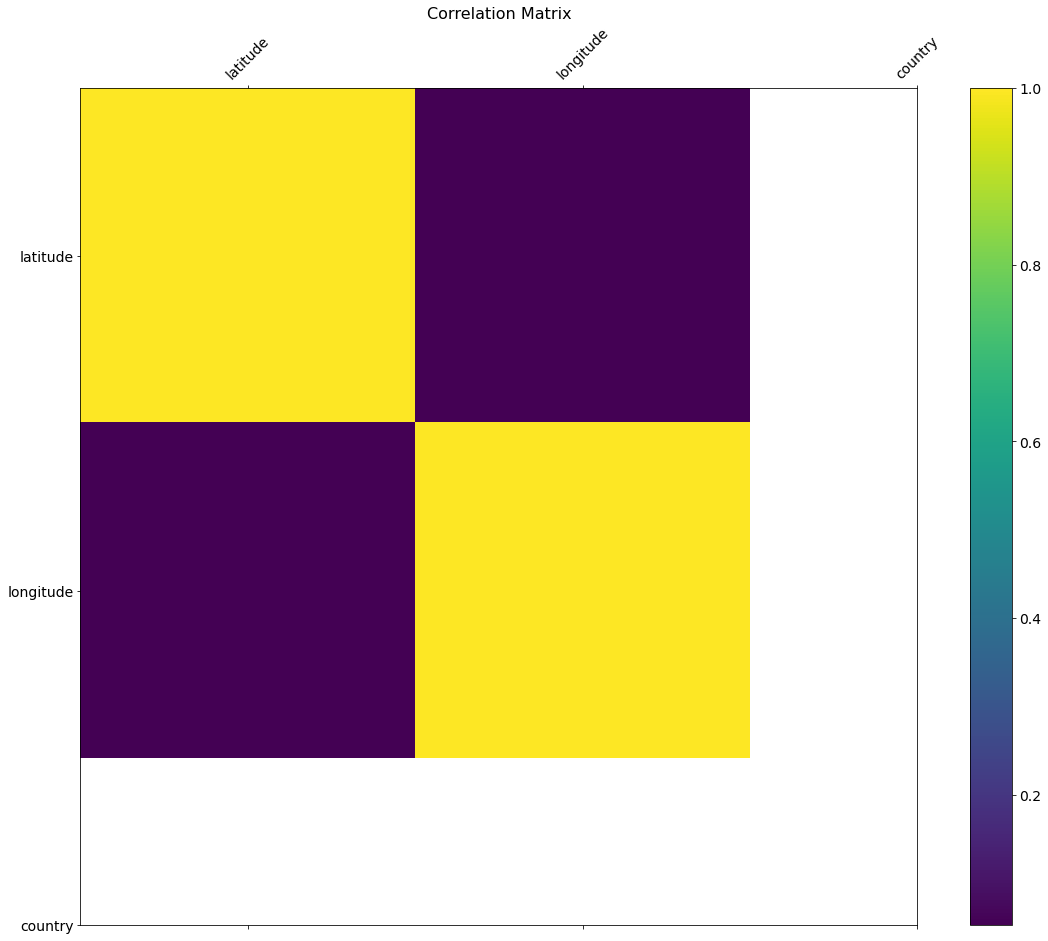

In [181]:
f = plt.figure(figsize=(19, 15))
plt.matshow(prueba.corr(), fignum=f.number)
plt.xticks(range(prueba.shape[1]), prueba.columns, fontsize=14, rotation=45)
plt.yticks(range(prueba.shape[1]), prueba.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

Text(0.5, 1.0, 'Correlation Matrix')

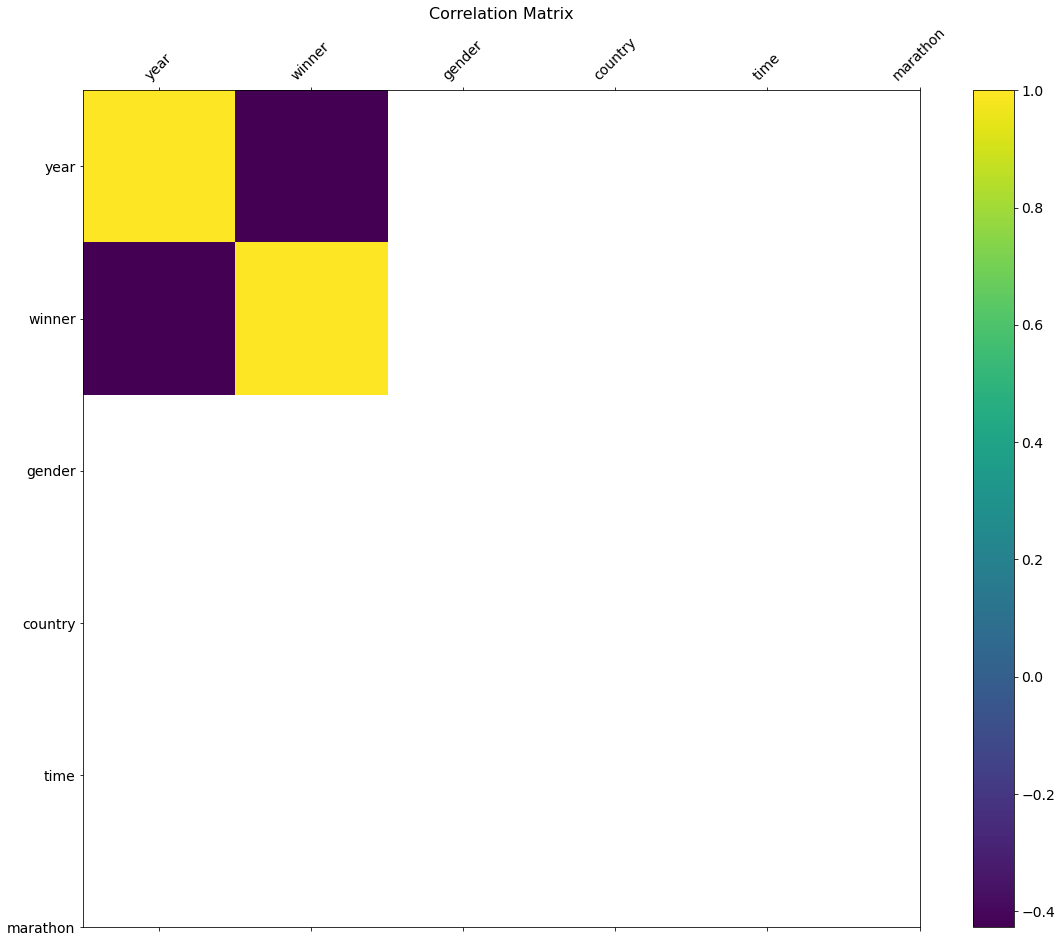

In [182]:
f = plt.figure(figsize=(19, 15))
plt.matshow(majors.corr(), fignum=f.number)
plt.xticks(range(majors.shape[1]), majors.columns, fontsize=14, rotation=45)
plt.yticks(range(majors.shape[1]), majors.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [ ]:
'Kenya' or 'United States' or 'Ethiopia' or 'Germany' or 'United Kingdom' or 'Japan' or 'Norway' or 'Canada' or 'Portugal' or 'Finland' or 'Mexico' or 'Russia' or 'Poland' or 'Brazil' or 'Italy' or 'Belgium' or 'South Africa' or 'New Zealand' or 'Morocco' or 'Tanzania' or 'Australia' or 'South Korea' or 'Ireland' or 'Denmark' or 'Switzerland' or 'Sweden' or 'Greece' or 'Spain' or 'Romania' or 'Colombia' or 'Latvia' or 'Guatemala' or 'Soviet Union' or 'Yugoslavia' or 'China' or 'Hungary' or 'Eritrea'

In [184]:
altitudes = [-0.023559, 37.09024, 9.145, 51.165691, 55.378051, 36.204824, 60.472024, 56.130366, 39.399872, 61.92411, 23.634501,61.52401, 51.919438, -14.235004, 41.87194, 50.503887, -30.559482, -40.900557, 31.791702, -6.369028, -25.274398, 35.907757, 53.41291, 56.26392, 46.818188, 60.128161, 39.074208, 40.463667, 45.943161, 4.570868, 56.879635, 15.783471, 7.495, 2.658, 35.86166, 47.162494, 19.503304, 15.179384]
altitudes

[-0.023559,
 37.09024,
 9.145,
 51.165691,
 55.378051,
 36.204824,
 60.472024,
 56.130366,
 39.399872,
 61.92411,
 23.634501,
 61.52401,
 51.919438,
 -14.235004,
 41.87194,
 50.503887,
 -30.559482,
 -40.900557,
 31.791702,
 -6.369028,
 -25.274398,
 35.907757,
 53.41291,
 56.26392,
 46.818188,
 60.128161,
 39.074208,
 40.463667,
 45.943161,
 4.570868,
 56.879635,
 15.783471,
 7.495,
 2.658,
 35.86166,
 47.162494,
 19.503304,
 15.179384]

In [185]:
altitude = dict(zip(mylabels, altitudes))
altitude

{'Kenya': -0.023559,
 'United States': 37.09024,
 'Ethiopia': 9.145,
 'Germany': 51.165691,
 'United Kingdom': 55.378051,
 'Japan': 36.204824,
 'Norway': 60.472024,
 'Canada': 56.130366,
 'Portugal': 39.399872,
 'Finland': 61.92411,
 'Mexico': 23.634501,
 'Russia': 61.52401,
 'Poland': 51.919438,
 'Brazil': -14.235004,
 'Italy': 41.87194,
 'Belgium': 50.503887,
 'South Africa': -30.559482,
 'New Zealand': -40.900557,
 'Morocco': 31.791702,
 'Tanzania': -6.369028,
 'Australia': -25.274398,
 'South Korea': 35.907757,
 'Ireland': 53.41291,
 'Denmark': 56.26392,
 'Switzerland': 46.818188,
 'Sweden': 60.128161,
 'Greece': 39.074208,
 'Spain': 40.463667,
 'Romania': 45.943161,
 'Colombia': 4.570868,
 'Latvia': 56.879635,
 'Guatemala': 15.783471,
 'Soviet Union': 7.495,
 'Yugoslavia': 2.658,
 'China': 35.86166,
 'Hungary': 47.162494,
 'Eritrea': 19.503304}

In [45]:
dict2 = {"Tasks": ["Searching datasets", "Path control", "Working in modules: functions, bucles...", "Wrangling Data: NaN, duplicates, outliers", "Visualization Data: graphics, boxplots", "Analyzing results", "Researching for value added"], "Hours": [32, 15, 72, 24, 192, 24, 12]}
dict2

{'Tasks': ['Searching datasets',
  'Path control',
  'Working in modules: functions, bucles...',
  'Wrangling Data: NaN, duplicates, outliers',
  'Visualization Data: graphics, boxplots',
  'Analyzing results',
  'Researching for value added'],
 'Hours': [32, 15, 72, 24, 192, 24, 12]}

In [57]:
Tasks = pd.DataFrame(dict2)
Tasks

,Tasks,Hours
0,Searching datasets,32
1,Path control,15
2,"Working in modules: functions, bucles...",72
3,"Wrangling Data: NaN, duplicates, outliers",24
4,"Visualization Data: graphics, boxplots",192
5,Analyzing results,24
6,Researching for value added,12


In [51]:
tasks = []
hours = []

for x, y in dict2.items():
    tasks.append(x)
    hours.append(y)
print(tasks)
print(hours)

['Tasks', 'Hours']
[['Searching datasets', 'Path control', 'Working in modules: functions, bucles...', 'Wrangling Data: NaN, duplicates, outliers', 'Visualization Data: graphics, boxplots', 'Analyzing results', 'Researching for value added'], [32, 15, 72, 24, 192, 24, 12]]


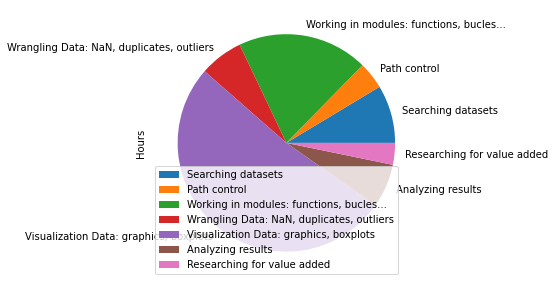

In [58]:
Tasks.plot.pie(y='Hours', figsize=(5,5),labels=Tasks['Tasks'])
plt.show()

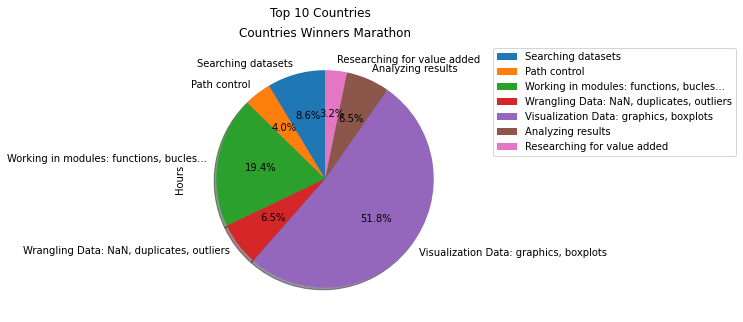

<Figure size 432x288 with 0 Axes>

In [64]:
Tasks.plot.pie(y='Hours', figsize=(5,5),labels=Tasks['Tasks'], autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Countries Winners Marathon")

plt.legend(Tasks["Tasks"], bbox_to_anchor=(1.10, 1), loc= 'upper left')
plt.suptitle("Top 10 Countries", fontsize=12)
plt.show()
plt.savefig('Top_10_Countries.png')

In [ ]:
ax1.pie(Top_others["Counts"], labels = Top_others["Country"], autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Countries Winners Marathon")
ax1.axis('equal')
plt.legend(Top_others["Country"], bbox_to_anchor=(1.10, 1), loc= 'upper left')
plt.suptitle("Top 10 Countries", fontsize=12)
plt.show()
plt.savefig('Top_10_Countries.png')